In [26]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Using double backslashes
apple_file_path = 'D:\\\\BelajarML\\\\dataset\\\\apple_quality.csv'
apple_data = pd.read_csv(apple_file_path)
apple_data

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [3]:
apple_data.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [4]:
apple_data.drop_duplicates()
apple_data

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [5]:
apple_data[apple_data.duplicated()]


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality


In [6]:
apple_data.dropna()


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


In [7]:
apple_data.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

# Visual

<Axes: xlabel='A_id', ylabel='Size'>

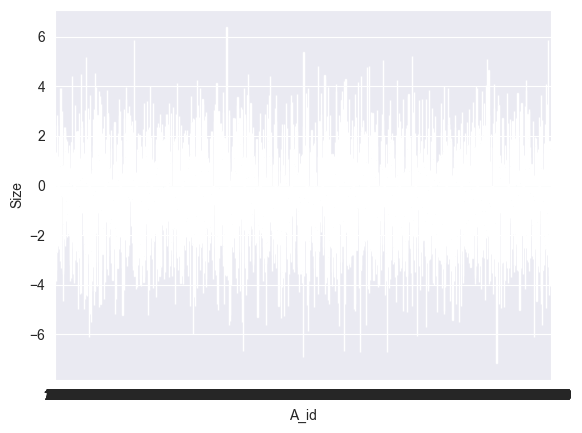

In [8]:
sns.barplot(data=apple_data, x='A_id', y='Size')

In [9]:
#tentukan akurasi apel
apple_data.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

<Axes: xlabel='A_id', ylabel='Size'>

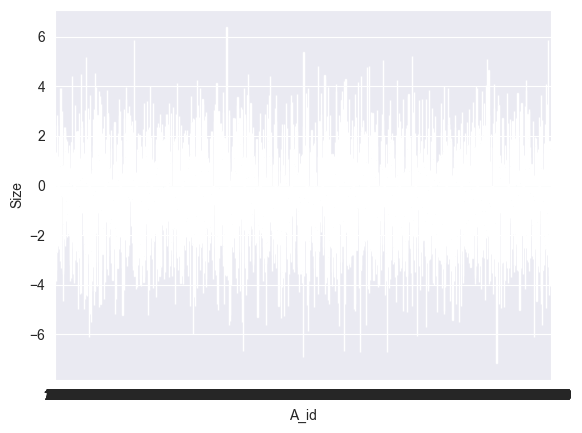

In [10]:
sns.barplot(apple_data, x='A_id', y='Size')

In [11]:
apple_data.isnull()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
3996,False,False,False,False,False,False,False,False,False
3997,False,False,False,False,False,False,False,False,False
3998,False,False,False,False,False,False,False,False,False
3999,False,False,False,False,False,False,False,False,False


In [12]:
apple_data_non_mis = apple_data.dropna()
apple_data_non_mis

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


In [13]:
apple_data_non_mis.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

In [14]:
apple_data_non_mis[apple_data_non_mis.duplicated()]

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality


In [15]:
le = LabelEncoder()
apple_data_non_mis['Quality'] = le.fit_transform(apple_data_non_mis['Quality'])
apple_data_non_mis['Quality'].unique()
apple_data_non_mis

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19452\3653743302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_data_non_mis['Quality'] = le.fit_transform(apple_data_non_mis['Quality'])


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,0
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,1
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,0
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,1


In [16]:
mms = MinMaxScaler()
apple_data_scaled = mms.fit_transform(apple_data_non_mis)
apple_data_scaled = pd.DataFrame(apple_data_scaled, columns=apple_data_non_mis.columns)
apple_data_scaled

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.00000,0.234669,0.358370,0.922484,0.368781,0.585819,0.472770,0.452225,1.0
1,0.00025,0.439331,0.333107,0.795706,0.558928,0.511408,0.513807,0.436185,1.0
2,0.00050,0.505948,0.448092,0.388567,0.417732,0.660388,0.444693,0.668192,0.0
3,0.00075,0.479014,0.376971,0.619422,0.435629,0.720370,0.187052,0.541180,1.0
4,0.00100,0.628107,0.452317,0.490589,0.402347,0.674814,0.348084,0.521150,1.0
...,...,...,...,...,...,...,...,...,...
3995,0.99900,0.531867,0.470029,0.239644,0.477379,0.574794,0.618866,0.495885,0.0
3996,0.99925,0.505867,0.703146,0.504203,0.395971,0.449218,0.364566,0.614957,1.0
3997,0.99950,0.333173,0.387278,0.335661,0.490846,0.612443,0.811182,0.393744,0.0
3998,0.99975,0.231869,0.415014,0.697913,0.428137,0.609571,0.463966,0.331650,1.0


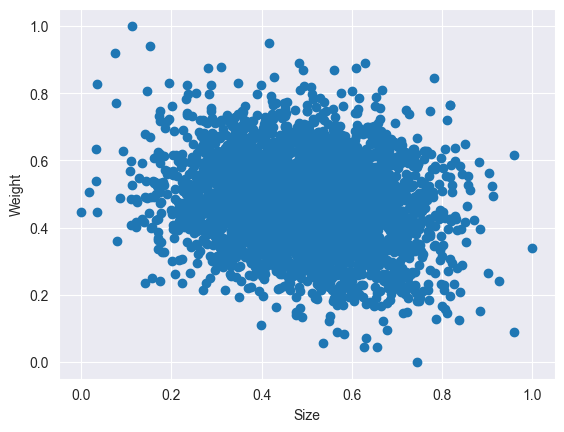

In [17]:

# sns.set_theme(style="ticks")
# 
# df = sns.load_dataset(apple_data_scaled)
# sns.pairplot(df, hue="Weight")
fig, ax = plt.subplots()

ax.scatter(apple_data_scaled['Size'], apple_data_scaled['Weight'])
plt.xlabel("Size")
plt.ylabel("Weight")
plt.show()

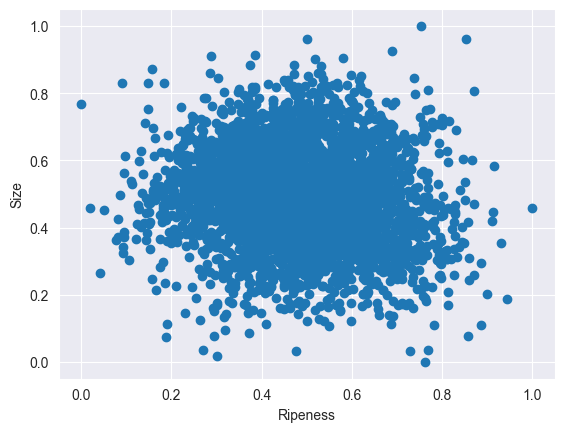

In [18]:
fig, ax = plt.subplots()

ax.scatter(apple_data_scaled['Ripeness'], apple_data_scaled['Size'])
plt.xlabel("Ripeness")
plt.ylabel("Size")
plt.show()

In [19]:
reg = linear_model.LinearRegression()
reg.fit(X=apple_data_scaled, y=apple_data_scaled['Weight'])

LinearRegression()

In [20]:
apple_data_scaled['Quality'] = apple_data_scaled['Quality'].astype(int)
apple_data_scaled

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.00000,0.234669,0.358370,0.922484,0.368781,0.585819,0.472770,0.452225,1
1,0.00025,0.439331,0.333107,0.795706,0.558928,0.511408,0.513807,0.436185,1
2,0.00050,0.505948,0.448092,0.388567,0.417732,0.660388,0.444693,0.668192,0
3,0.00075,0.479014,0.376971,0.619422,0.435629,0.720370,0.187052,0.541180,1
4,0.00100,0.628107,0.452317,0.490589,0.402347,0.674814,0.348084,0.521150,1
...,...,...,...,...,...,...,...,...,...
3995,0.99900,0.531867,0.470029,0.239644,0.477379,0.574794,0.618866,0.495885,0
3996,0.99925,0.505867,0.703146,0.504203,0.395971,0.449218,0.364566,0.614957,1
3997,0.99950,0.333173,0.387278,0.335661,0.490846,0.612443,0.811182,0.393744,0
3998,0.99975,0.231869,0.415014,0.697913,0.428137,0.609571,0.463966,0.331650,1


In [21]:
correlation = apple_data_scaled.select_dtypes("number").drop(columns="Quality").corr()
correlation.corr()
# sns.heatmap(correlation)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
A_id,1.000000,-0.140683,-0.035633,-0.039552,-0.108456,-0.094754,0.030321,-0.235676
Size,-0.140683,1.000000,-0.255200,-0.516588,0.318170,-0.100484,-0.164957,0.269130
Weight,-0.035633,-0.255200,1.000000,-0.174236,-0.144338,-0.157256,-0.332621,-0.037764
Sweetness,-0.039552,-0.516588,-0.174236,1.000000,-0.095268,0.200968,-0.391119,0.109561
Crunchiness,-0.108456,0.318170,-0.144338,-0.095268,1.000000,-0.508801,-0.316318,0.035027
Juiciness,-0.094754,-0.100484,-0.157256,0.200968,-0.508801,1.000000,-0.153964,0.354205
Ripeness,0.030321,-0.164957,-0.332621,-0.391119,-0.316318,-0.153964,1.000000,-0.442636
Acidity,-0.235676,0.269130,-0.037764,0.109561,0.035027,0.354205,-0.442636,1.000000


# Splitting data  into training

In [22]:
X_train, Y_train = train_test_split(apple_data_scaled, test_size=50)
Y_train

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
103,0.025756,0.382383,0.612493,0.540034,0.493682,0.609304,0.442251,0.380796,1
3731,0.932983,0.440918,0.620726,0.131905,0.547589,0.266671,0.608558,0.485490,0
2852,0.713178,0.604009,0.179944,0.727952,0.748138,0.576355,0.578752,0.732963,1
820,0.205051,0.278019,0.553125,0.483883,0.706654,0.905028,0.261653,0.238926,1
2004,0.501125,0.560560,0.444784,0.615316,0.506731,0.577201,0.237133,0.608482,1
2054,0.513628,0.396910,0.350067,0.723822,0.474456,0.671034,0.547372,0.272051,1
3938,0.984746,0.480835,0.558502,0.466181,0.427818,0.755735,0.338474,0.772856,0
1801,0.450363,0.170177,0.364314,0.636586,0.507643,0.568071,0.720345,0.545422,0
2539,0.634909,0.629413,0.547242,0.393110,0.540194,0.391916,0.690158,0.585552,1
2757,0.689422,0.439715,0.376555,0.431510,0.481864,0.494483,0.589313,0.577740,0


# Splitting data  into testing

In [23]:
X_testing, Y_testing = train_test_split(apple_data_scaled, test_size=50)
X_testing

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
280,0.070018,0.631307,0.454061,0.237711,0.489433,0.533554,0.566772,0.482162,0
410,0.102526,0.497359,0.463632,0.291147,0.504504,0.273427,0.636676,0.409919,0
3809,0.952488,0.741767,0.380944,0.290358,0.590809,0.517895,0.506225,0.528975,1
1484,0.371093,0.511911,0.476282,0.298832,0.477321,0.736111,0.622846,0.623801,0
186,0.046512,0.407735,0.681346,0.443869,0.430077,0.276520,0.517371,0.628998,0
...,...,...,...,...,...,...,...,...,...
1746,0.436609,0.273941,0.585574,0.335047,0.553908,0.490852,0.662914,0.507242,0
2439,0.609902,0.537077,0.627193,0.435500,0.423650,0.856555,0.292852,0.724724,0
2268,0.567142,0.436117,0.523074,0.486461,0.478641,0.520782,0.567673,0.511008,1
3450,0.862716,0.430388,0.436992,0.476655,0.393897,0.259901,0.615538,0.405148,0


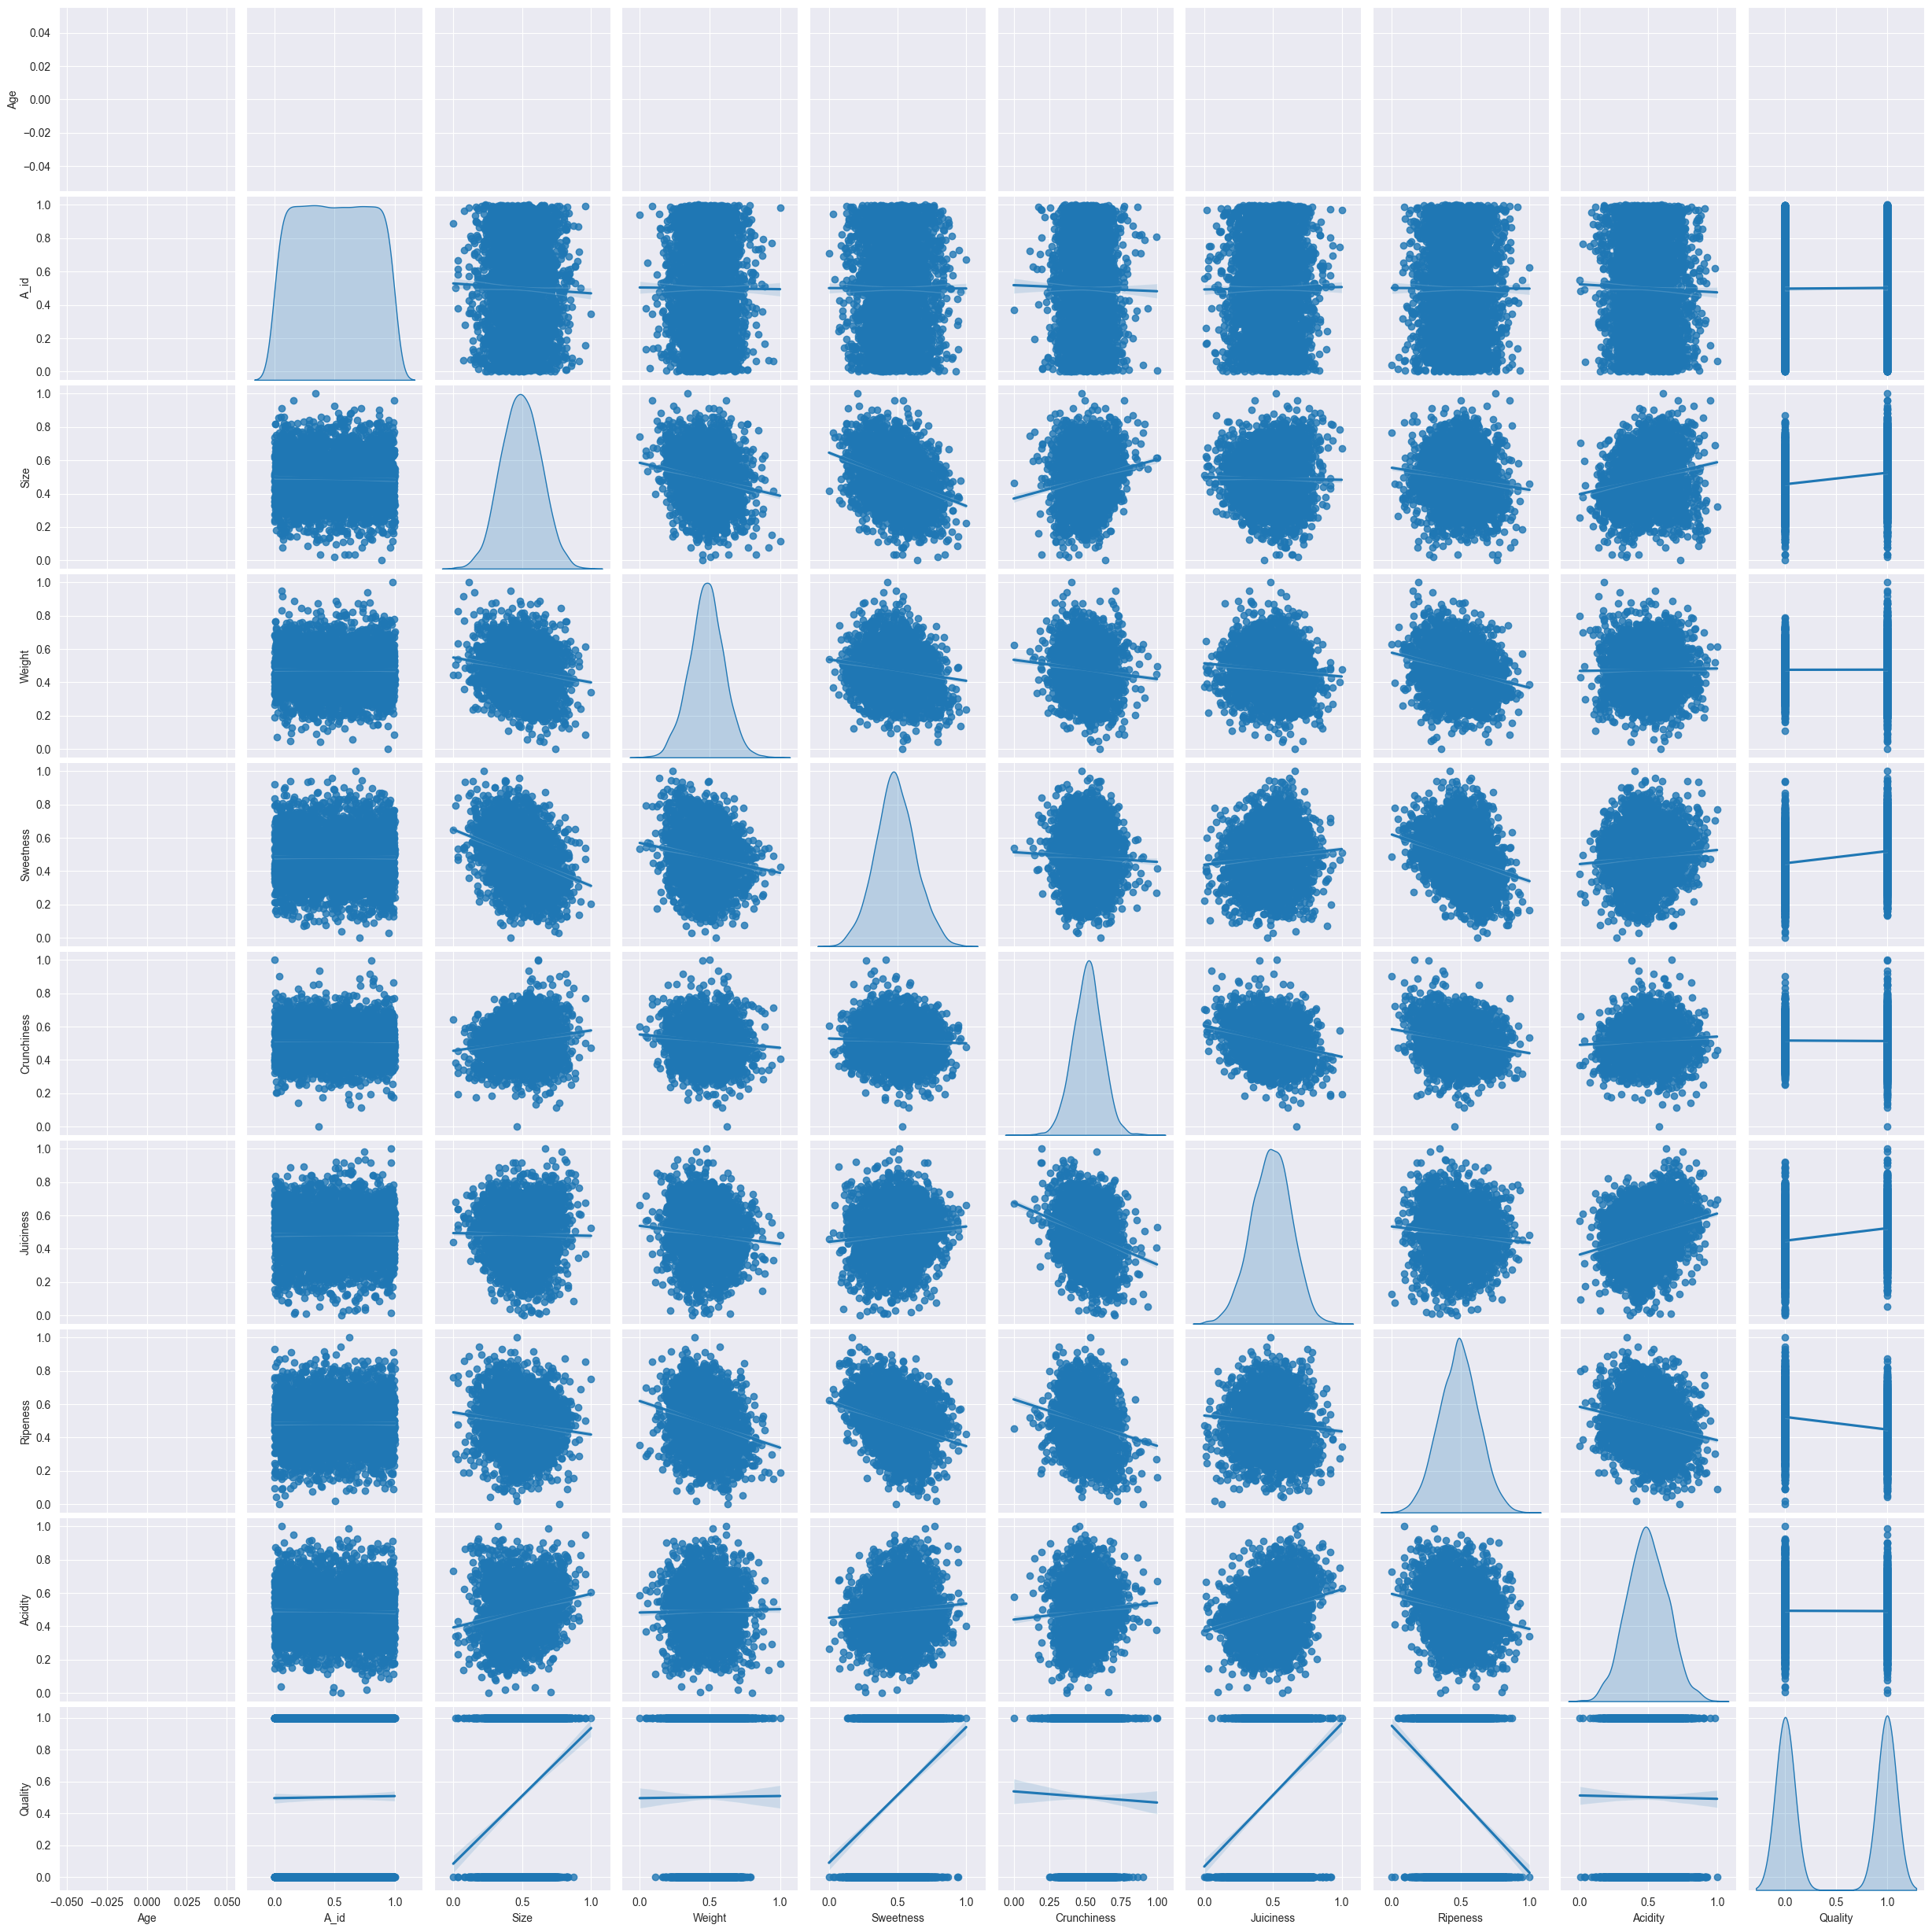

In [24]:
train_dataset = X_train.copy()
train_dataset.insert(0, "Age", Y_train['Acidity'])
sns.pairplot(train_dataset, kind="reg", diag_kind="kde")

In [28]:

knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_train)
accuracy = accuracy_score(Y_testing, y_pred)
print("Accuracy:", accuracy)

ValueError: Found input variables with inconsistent numbers of samples: [3950, 50]